# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Файл с данными и общая информация.

In [1]:
import warnings

from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore")
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
# Посмотрим названия столбцов
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

На первый взгляд практически все столбцы имеют корректные названия, приведём все названия к змеиному регистру + приведём к единому формату.

In [3]:
df = df.rename(
 columns={
'cityCenters_nearest': 'city_center_nearest',
'studio': 'is_studio'
 }
)

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
# Оценим общую информацию
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  is_studio             23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных присутствуют пустые значения в ряде столбцов, с которыми будем разбираться в разделе предобработки данных.  
Также потребуется обработка типов данных в некоторых столбцах.

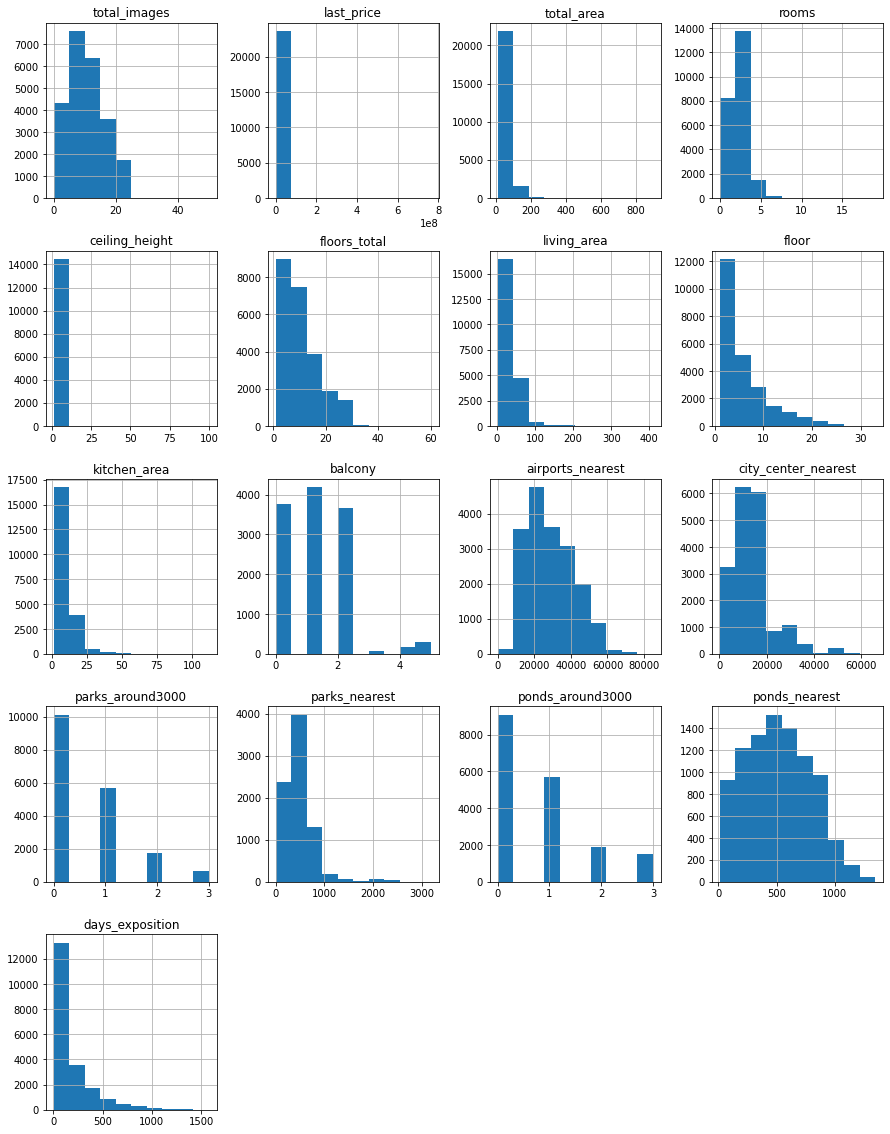

In [6]:
# Построим общую гистограмму для числовых столбцов таблицы.
df.hist(bins=10, figsize=(15, 20));

В первую очередь обратим внимание на график распределения стоимости.  
Выглядит странно, вероятно присутствуют довольно высокие значения.

## Предобработка данных

### Обработка пропусков

In [7]:
# Оценим количество пропусков
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропуски присутствуют в ряде столбцов:
- ceiling_hight - на данный момент оставим без именений, несмотря на большое количество пропусков (порядка 40%). В теории можно пытаться заполнить похожими квартирами (схожими по метражу, району, этажу).
- floors_total - Учитывая отсуствие адресов квартир, придётся оставить без изменений.  
- living_area - размер площади не должен быть критичен для процесса анализа, т.к. присутствуют данные по полной площади объектов.
- is_appartment - вероятнее всего пропуски - отсутствие флага аппартаментов. Заменим пропуски на False.
- balcony - вероятно заменим пропуски на 0.
- locality_name - отсутствие названия района не критично (49 пропусков) при наличии информации удалённости от центра.

Пропуски в следующих параметрах квартир заполнить чем-либо будет затруднительно:
- kitchen_area
- airports_nearest
- cictyCenter_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- pond_nearest
- days_exposition

**Вероятно создатели объявлений заполняли не все параметры, это может являться основной причиной наличия пропусков.  
По расстояниям параметры определялись автоматически, вероятно мог произойти сбой в работе алгоритма.**

In [8]:
# Проверим значения флага аппартаментов и заменим пропуски на False
print(df['is_apartment'].unique())
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].unique())

[nan False True]
[False  True]


In [9]:
# Проверим значения количества балконов и заменим пропуски на 0
print(df['balcony'].unique())
df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]
[0. 2. 1. 5. 4. 3.]


### Работа с типами данных

Приведём тип данных столбца `first_day_exposition` в читаемый формат даты/времени.

In [10]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [11]:
# Есть вероятность, что время не конкретизировано
print(pd.DatetimeIndex(df['first_day_exposition']).hour.unique())

Int64Index([0], dtype='int64', name='first_day_exposition')


Так и оказалось, ограничимся датой.

In [12]:
df['first_day_exposition_date_time'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
print(df['first_day_exposition_date_time'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition_date_time, dtype: datetime64[ns]


In [13]:
df['balcony'] = df['balcony'].astype('int')

In [14]:
for i in range(len(df)):
    try:
        df['floors_total'][i].astype('int')
    except:
        continue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   total_images                    23699 non-null  int64         
 1   last_price                      23699 non-null  float64       
 2   total_area                      23699 non-null  float64       
 3   first_day_exposition            23699 non-null  object        
 4   rooms                           23699 non-null  int64         
 5   ceiling_height                  14504 non-null  float64       
 6   floors_total                    23613 non-null  float64       
 7   living_area                     21796 non-null  float64       
 8   floor                           23699 non-null  int64         
 9   is_apartment                    23699 non-null  bool          
 10  is_studio                       23699 non-null  bool          
 11  op

Вероятнее всего дробные части нулевые в следующих столбцах:
- floors_total
- balcony
- parks_around3000
- ponds_around3000
- days_exposition
- airport_nearest
- city_center_nearest
- parks_nearest
- ponds_nearest

Но мы оставим их без изменений, так как я не осилил превратить их в Int, а наличие Float в целочисленных (по логике) переменных раздражает внутреннего перфекциониста, но не является критичным для задачи.

### Работа с дубликатами

In [15]:
# Выполним поиск полных дубликатов
print(df.duplicated().sum())

0


In [16]:
# Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты.
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [17]:
# Оценим общее количество до изменений
print(df['locality_name'].value_counts().count())

364


In [18]:
# Избавимся от букв "ё", а также от вариативности в названиях локаций
locality_name_to_replace = [
    'городского типа ',
    'городской ',
    'деревня ',
    'коттеджный поселок ',
    'городской ',
    'поселок при железнодорожной станции ',
    'поселок станции ',
    'поселок имени ',
    'садоводческое некоммерческое товарищество ',
    'садоводческое товарищество ',
    'садовое товарищество ',
    'село ',
    'поселок '
]

df['locality_name'].replace(regex=True,inplace=True,to_replace=r'ё',value=r'е')
df['locality_name'].replace(regex=True,inplace=True,to_replace=locality_name_to_replace,value=r'')

In [19]:
# Оценим общее количество после изменений и новый список названий
print(df['locality_name'].value_counts().count())
print(df['locality_name'].unique())

305
['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельман

Удалось избавиться более чем от 16% неявых дубликатов в названиях.

In [20]:
# Проверим ещё раз сет на наличие полных дубликатов после корректировки названий.
df.duplicated().sum()

0

### Редкие и выбивающиеся значения. 

In [21]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<AxesSubplot:>

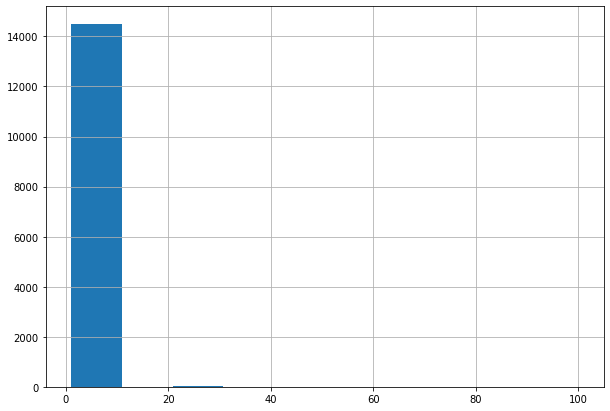

In [22]:
# Посмотрим на распределение высоты потолков
df['ceiling_height'].hist(bins=10, figsize=(10,7))

#data.hist()
# bins - количество корзин, range - ограничения диапазона.
#data['column'].hist(bins=11, range=(0,100)) # пример
#data.boxplot() # ящик с усами
#data.pivot_table(index=’name’, value=’time_spent’) # pivot table


Основной массив данных расположен в пределах 10 м.
Посмотрим на распределение редких значений.

36


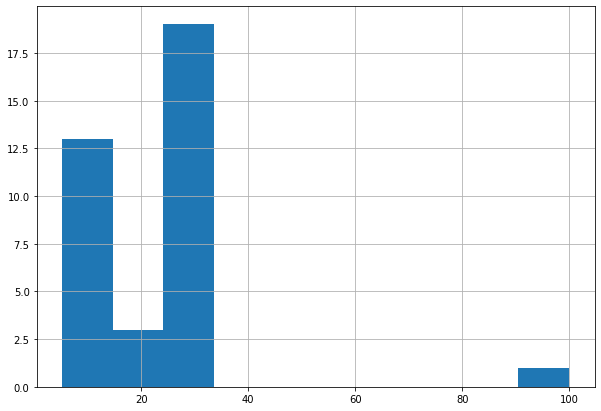

In [23]:
df[df['ceiling_height']>5]['ceiling_height'].hist(bins=10, figsize=(10,7))
print(df[df['ceiling_height']>5]['ceiling_height'].count())

Общее количество таких объявлений 36 шт. (около 0.15%).

<AxesSubplot:xlabel='ceiling_height'>

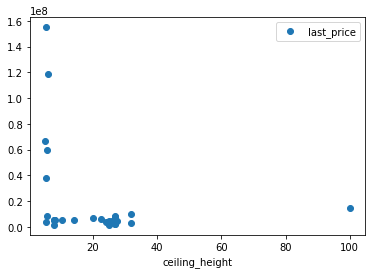

In [24]:
df[df['ceiling_height']>5].plot(x='ceiling_height', y='last_price', style='o', legend=True)

Корреляция между высотой потолков и стоимостью отсутствует, по диапазону 20 - 35 разделим на 10, всем остальным более 5м присвоим средние значения высоты потолков.

In [25]:
ceiling_height_mean = df['ceiling_height'].mean()
for i in range(len(df)):
    if 20 <= df['ceiling_height'][i] < 35:
        df['ceiling_height'][i] = df['ceiling_height'][i]/10
    elif df['ceiling_height'][i] >= 5:
        df['ceiling_height'][i] = ceiling_height_mean

<AxesSubplot:xlabel='ceiling_height'>

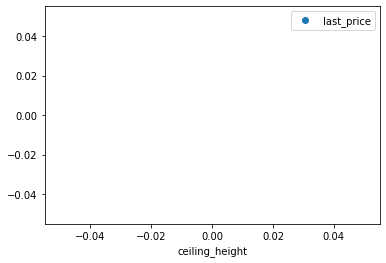

In [26]:
# Убедимся, что изменение на прошлом шаге произошло корректно.
df[df['ceiling_height']>5].plot(x='ceiling_height', y='last_price', style='o', legend=True)

<AxesSubplot:>

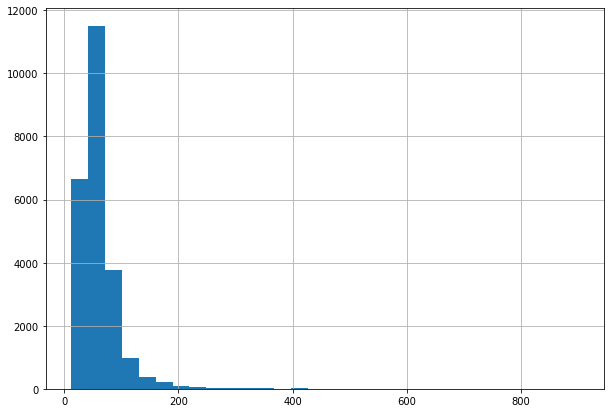

In [27]:
# Посмотрим на распределение показателя общей площади
df['total_area'].hist(bins=30, figsize=(10,7))

227


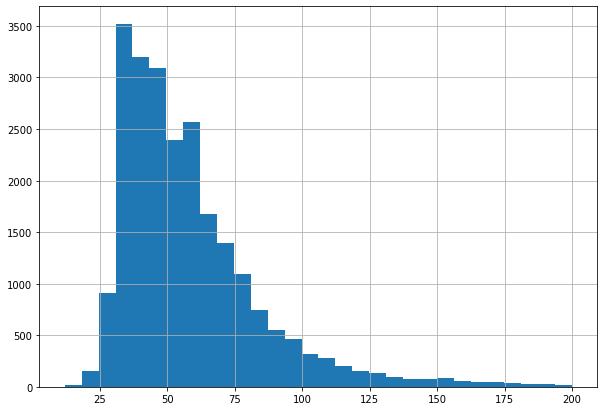

In [28]:
df[df['total_area']<=200]['total_area'].hist(bins=30, figsize=(10,7))
print(df[df['total_area']>200]['total_area'].count())

<AxesSubplot:xlabel='total_area'>

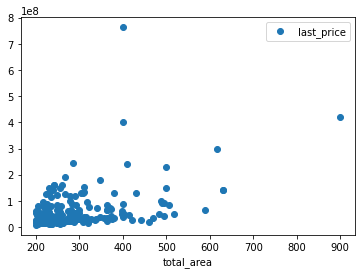

In [29]:
# Основной массив лежит в границе 200 м2, посмотрим подробнее на распределение выбивающихся значений и их количество.
df[df['total_area']>200].plot(x='total_area', y='last_price', style='o', legend=True)

<AxesSubplot:>

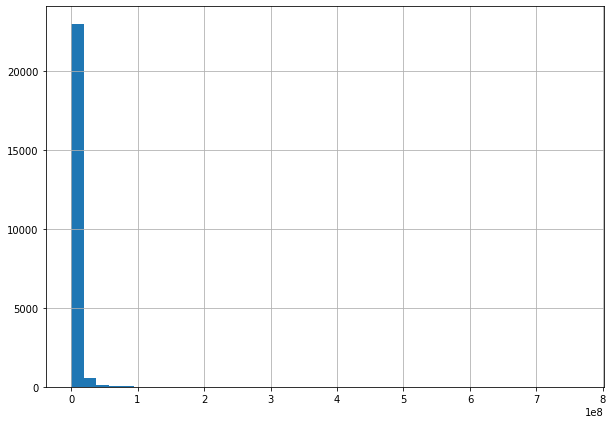

In [30]:
df['last_price'].hist(bins=40, figsize=(10,7))

131

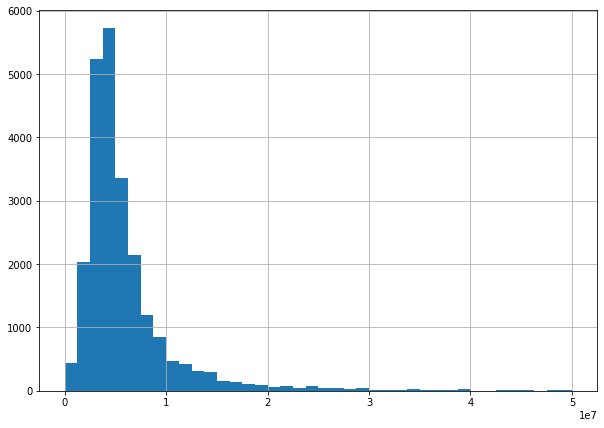

In [31]:
df[df['last_price']<=50000000]['last_price'].hist(bins=40, figsize=(10,7))
df[df['last_price']>50000000]['last_price'].count()

In [32]:
#Уточним количество подобных строк, превышающих стоимость в 200м2 или стоимость в 50 млн. руб.
df[(df['total_area']>200) | (df['last_price']>50000000)]['last_price'].count()

277

Обрежем строки, превышающие стоимость в 50 млн. руб. или общую площадь в 200 м2.
Это приведёт к сокращению датасета ~ на 1.2%. В противном случае крайне дорогое жильё может влиять на дальнейший анализ.

In [33]:
df = df[(df['total_area']<=200) | (df['last_price']<50000000)]

1     8047
2     7940
3     5807
4     1163
5      301
0      196
6       91
7       47
8        9
9        7
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64


count    23617.000000
mean         2.059110
std          1.056129
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

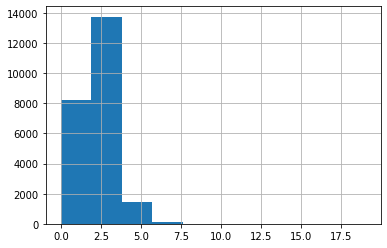

In [34]:
# Посмотрим на количество комнат
print(df['rooms'].value_counts())
df['rooms'].hist()
df['rooms'].describe()

Обрежем все объявления с количеством комнат большим 6.

In [35]:
print(df['rooms'].count())
df = df[df['rooms']<=6]
print(df['rooms'].count())

23617
23545


Мы избавились от аномальных значений ценой ~ 1.5% данных.

In [36]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'first_day_exposition_date_time'],
      dtype='object')

**Вывод:**
- Данные содержат пропуски. Часть из них нам удалось заполнить как в количественных (balcony), так и в категориальных (is_appartment, is_studio) переменных.  
- Скорректирован формат данных для даты размещения объявления и ряда количественных переменных.  
- Явные дубликаты в данных отсутсвуют.  
- Удалено порядка 16% неявных дубликатов в названиях населённых пунктов.


## Новые столбцы

In [37]:
# Стоимость квадратного метра площади
df['sq_m_price'] = df['last_price'] / df['total_area']

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [38]:
# День недели, месяц, год публикации объявления
import datetime
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition_date_time']).year # года
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition_date_time']).month # месяца
df['weekday_exposition'] = df['first_day_exposition_date_time'].dt.weekday

In [39]:
# Расстояние до центра города в километрах
df['city_center_nearest'] = (df['city_center_nearest'] / 1000).round()

In [40]:
# Тип этажа квартиры (значения — «первый», «последний», «другой»)
def categorize_floor(row):
    floor = row['floor']
    floors = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'unknown'

df['floor_group'] = df.apply(categorize_floor, axis=1)

## Исследовательский анализ данных

# Параметры объектов
Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

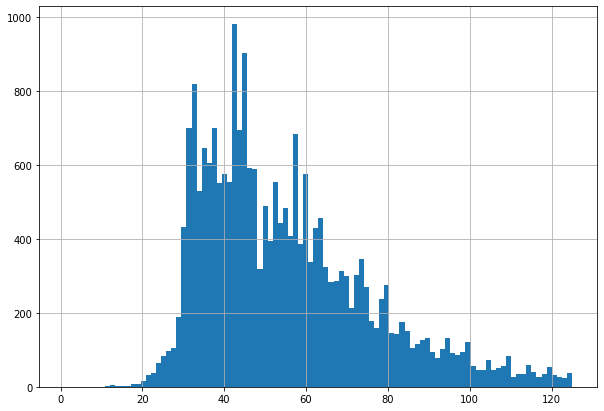

In [41]:
df['total_area'].hist(bins=100, figsize=(10,7), range=(1,125));

<AxesSubplot:>

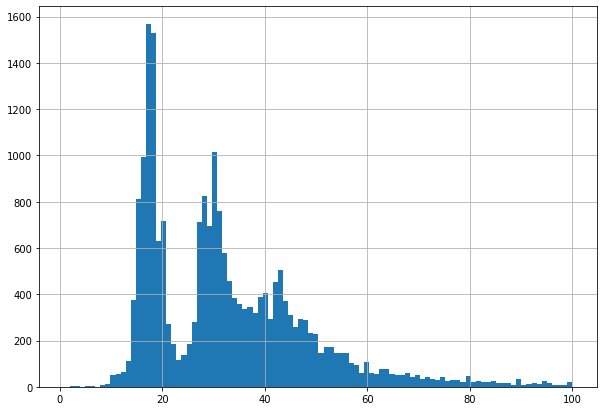

In [42]:
df['living_area'].hist(bins=100, figsize=(10,7), range=(1,100))

<AxesSubplot:>

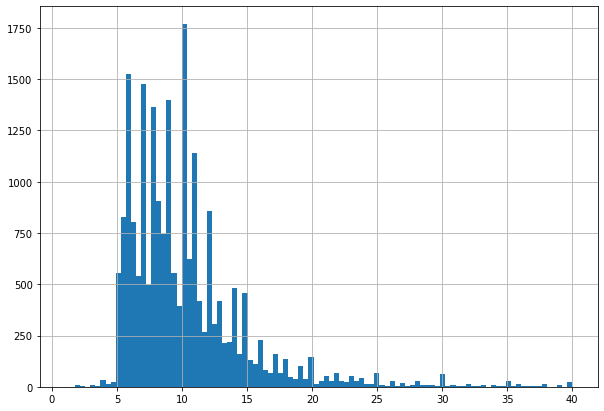

In [43]:
df['kitchen_area'].hist(bins=100, figsize=(10,7),range=(1,40))

Порядка половины квартир имеют общую площадь менее 50м2, около 45% приходится на квартиры от 50м2 до 100м2. Площадь 100м2+ занимает около 5% датасета.

<AxesSubplot:>

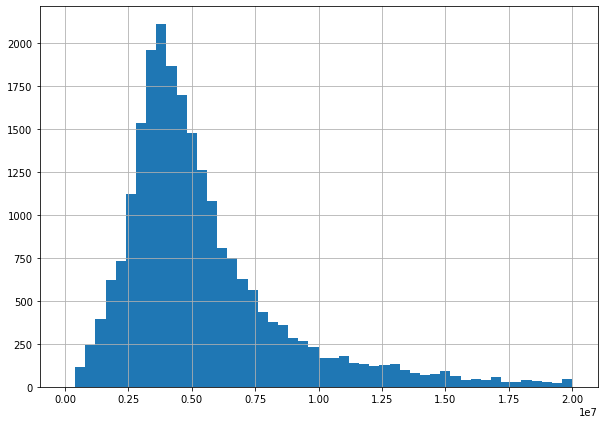

In [44]:
df['last_price'].hist(bins=50, figsize=(10,7), range=(0, 0.2 * 10 ** 8))

<AxesSubplot:>

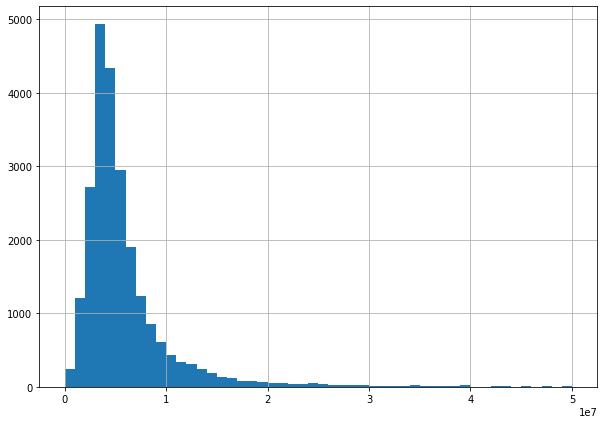

In [45]:
df[df['last_price']<= 5 * 10**7]['last_price'].hist(bins=50, figsize=(10,7))

Основной массив данных по стоимости находится в пределах 10 млн. руб. с пиком в районе 6 млн. руб.

<AxesSubplot:>

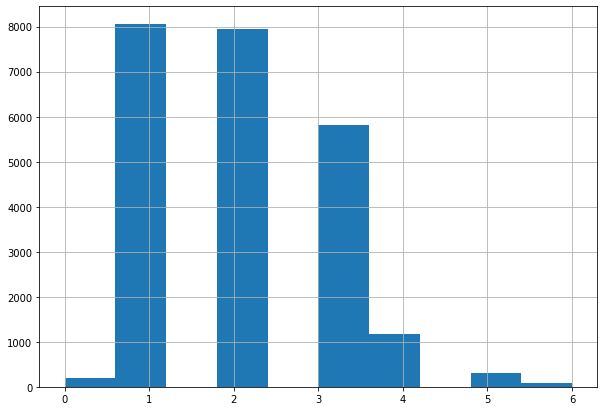

In [46]:
df['rooms'].hist(bins=10, figsize=(10,7))

Большую часть составляют объекты с 1-ой или 2-мя комнатами. В меньшей степени присутствуют 3-ёх комнатные квартиры.

<AxesSubplot:>

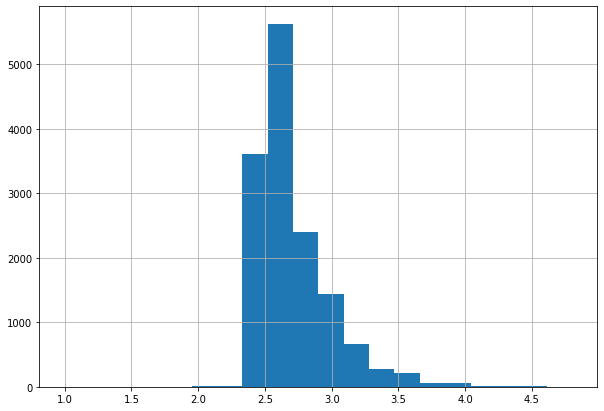

In [47]:
df['ceiling_height'].hist(bins=20, figsize=(10,7))

Основная часть объектов имеет высоту потолков  2.5м до 3.0м

<AxesSubplot:>

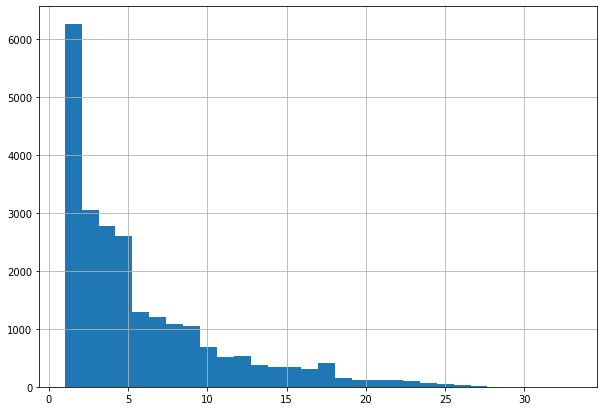

In [48]:
df['floor'].hist(bins=30, figsize=(10,7))

<AxesSubplot:>

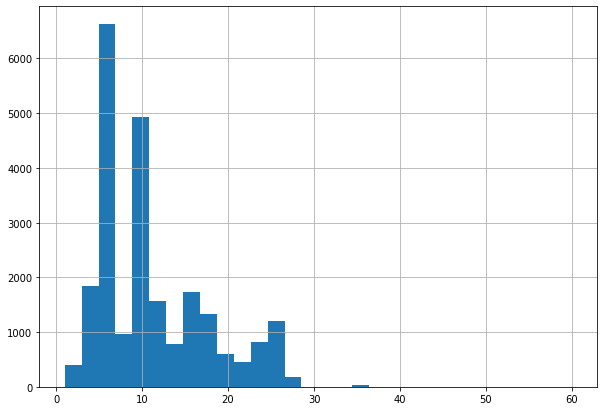

In [49]:
df['floors_total'].hist(bins=30, figsize=(10,7))

<AxesSubplot:>

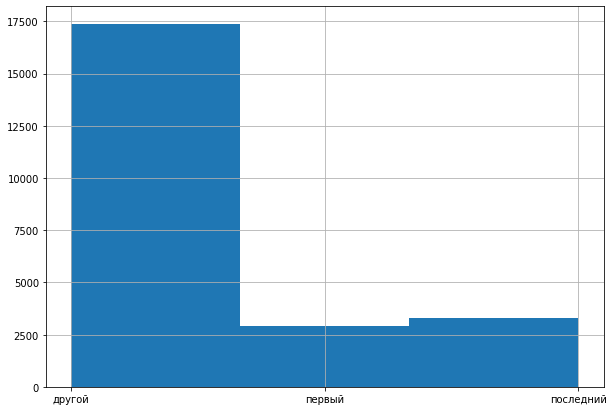

In [50]:
df['floor_group'].hist(bins=3, figsize=(10,7))

Больше всего представлены объекты до 5-го этажа, это объясняется общей этажностью представленных объектов (порядка четверти всех объектов представлена 5-ти этажными зданиями).

<AxesSubplot:>

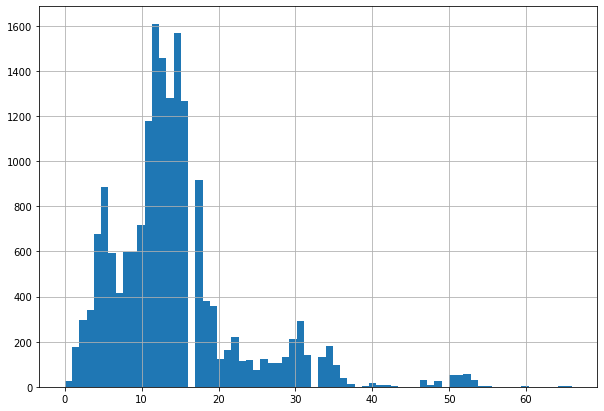

In [51]:
df['city_center_nearest'].hist(bins=70, figsize=(10,7))

<AxesSubplot:>

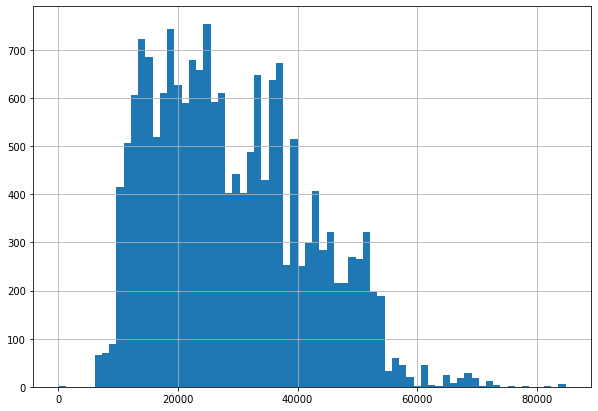

In [52]:
df['airports_nearest'].hist(bins=70, figsize=(10,7))

<AxesSubplot:>

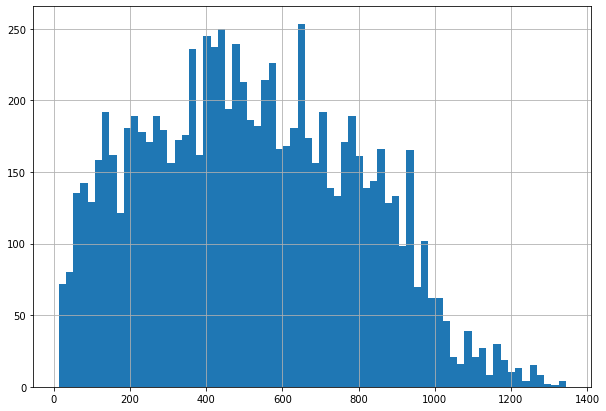

In [53]:
df['ponds_nearest'].hist(bins=70, figsize=(10,7))

Основное количетсво объектов находятся в пределах 15км от центра города.  

<AxesSubplot:>

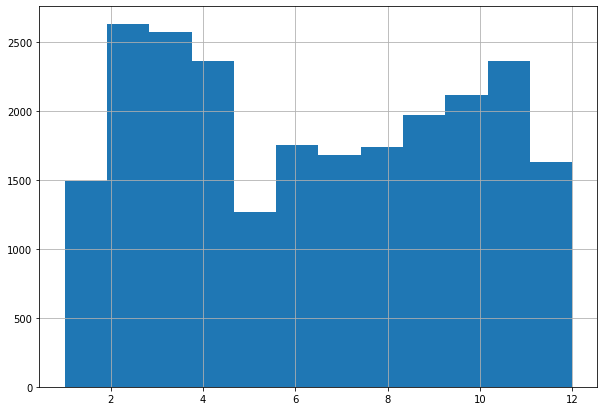

In [54]:
df['month_exposition'].hist(bins=12, figsize=(10, 7))

<AxesSubplot:>

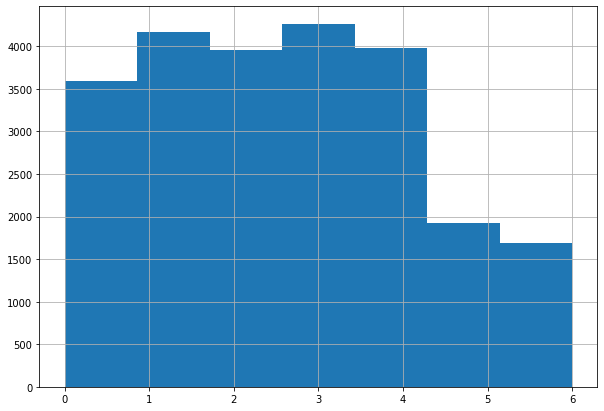

In [55]:
df['weekday_exposition'].hist(bins=7, figsize=(10, 7))

Реже всего объявления размещают в выходные дни. В месячной разбивке - в январе, мае и декабре (праздники).

### Как быстро продавались квартиры

<AxesSubplot:>

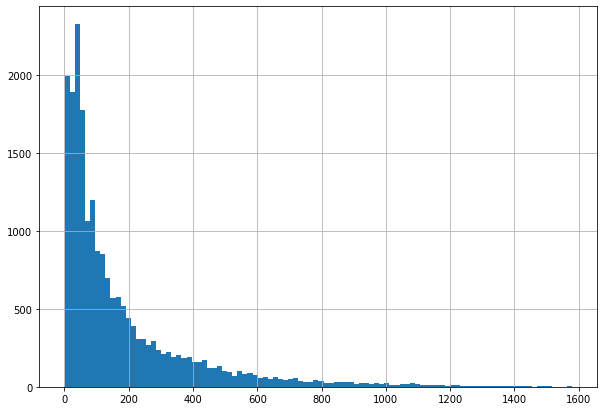

In [56]:
df['days_exposition'].hist(bins=100, figsize=(10, 7))

In [57]:
df['days_exposition'].mean()

180.122524995099

In [58]:
df['days_exposition'].median()

95.0

Медиана имеет значение 95 дней. Среднее значение составляет 180 дней
Быстрыми можно считать продажи в пределах одного месяца, необычайно долгими - больше двух лет.

count    20404.000000
mean       180.122525
std        219.038418
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

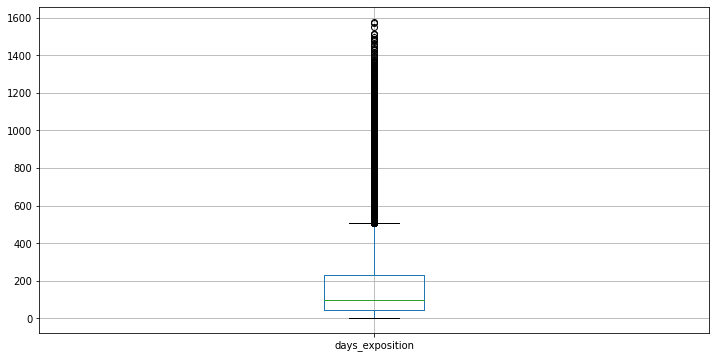

In [59]:
df.boxplot(column='days_exposition', figsize=(12,6))
df['days_exposition'].describe()

Всё, что лежит выше, чем Q3 + 1.5 межквартильными расстояниями можно считать необычайно долгими продажами. То есть грубо более 500 дней. Быстрые прождажи - 1 квартиль (менее 45 дней).

### Влияние факторов на стоимость

In [60]:
# Сформируем отдельный DF с интересующими параметрами и оценим корреляцию.
df_corr = (
    df[[
    'last_price', 
    'total_area', 
    'living_area', 
    'kitchen_area', 
    'rooms', 
    'floor_group', 
    'month_exposition', 
    'year_exposition', 
    'weekday_exposition']]
)

In [61]:
df_corr.corr()

,last_price,total_area,living_area,kitchen_area,rooms,month_exposition,year_exposition,weekday_exposition
last_price,1.000000,0.666394,0.561549,0.530549,0.396291,0.003288,-0.041530,-0.012171
total_area,0.666394,1.000000,0.927119,0.583936,0.764010,0.006668,-0.084080,-0.010778
living_area,0.561549,0.927119,1.000000,0.365052,0.858234,-0.004202,-0.072454,-0.008322
kitchen_area,0.530549,0.583936,0.365052,1.000000,0.218917,0.003113,-0.053701,-0.011705
rooms,0.396291,0.764010,0.858234,0.218917,1.000000,-0.003759,-0.053532,-0.004907
month_exposition,0.003288,0.006668,-0.004202,0.003113,-0.003759,1.000000,-0.271022,0.012129
year_exposition,-0.041530,-0.084080,-0.072454,-0.053701,-0.053532,-0.271022,1.000000,-0.004632
weekday_exposition,-0.012171,-0.010778,-0.008322,-0.011705,-0.004907,0.012129,-0.004632,1.000000


Наиболее высокая корреляция стоимости объекта наблюдается с общей площадью (а также жилой и кухонной, которые зависят от общей площади). Далее подробнее оценим графики зависимости.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

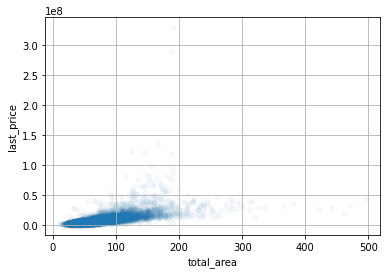

In [62]:
# Для наглядности отобразим квартиры площадью до 150м2 и стоимостью до 15 млн. руб.
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, grid=True)

С помощью подобного варианта мало что можно понять. Квартиры площадью до 150м2 сливаются в сплошное пятно, данных по площади > 200м2 или стоимости выше 5 млн. руб. крайне мало.
Применим вариант с использованием pivot_table.

<AxesSubplot:xlabel='total_area'>

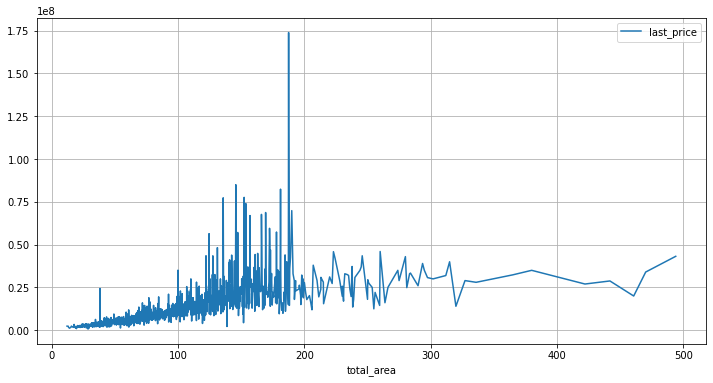

In [63]:
(df
.pivot_table(index='total_area', values='last_price')
.plot(grid=True, figsize=(12, 6))
)

Уже лучше, попробуем ограничить площадь объектов до 200м2 включительно и стоимостью до 15млн. руб.

<AxesSubplot:xlabel='total_area'>

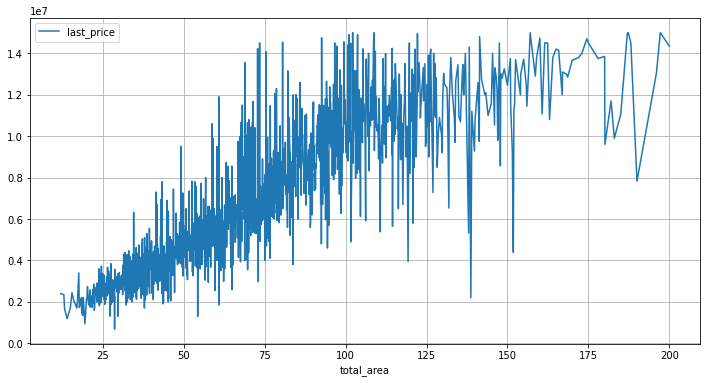

In [64]:
(df
.query('total_area <= 200 & last_price <= 1.5 * 10 ** 7')
.pivot_table(index='total_area', values='last_price')
.plot(grid=True, figsize=(12, 6))
)

Также посмотрим на плотность распределения, ограничив дополнительно площадь до 100м2

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

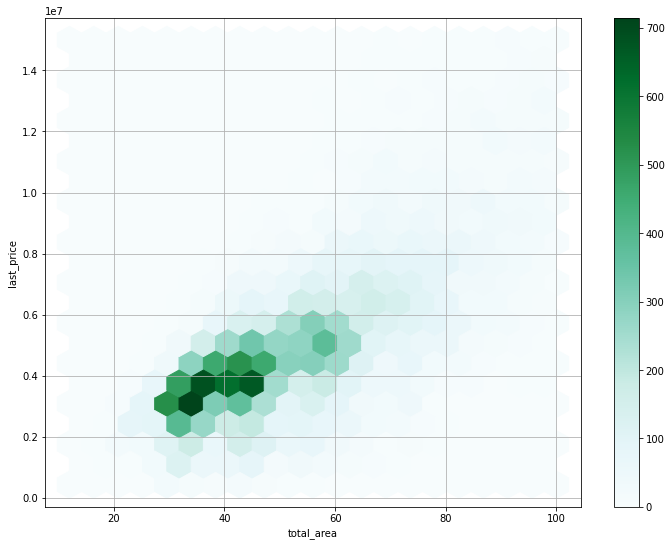

In [65]:
df[(df['total_area']<=100) & (df['last_price'] <= 1.5 * 10**7)].plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(12, 9), sharex=False, grid=True)

Большая часть объектов имеет площадь до 70м2 и стоимость до 8 млн. руб.

In [66]:
df[(df['total_area'] <= 70) & (df['last_price'] <= 8 * 10 ** 6)]['total_images'].count()

17281

In [67]:
df[df['total_area'] <= 70]['total_images'].count()

17961

In [68]:
df['total_images'].count()

23545

<AxesSubplot:xlabel='living_area'>

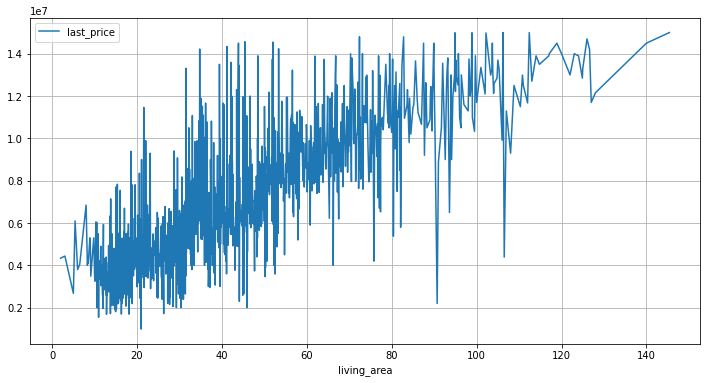

In [69]:
(df
.query('total_area <= 200 & last_price <= 1.5 * 10 ** 7')
.pivot_table(index='living_area', values='last_price')
.plot(grid=True, figsize=(12,6))
)

<AxesSubplot:xlabel='kitchen_area'>

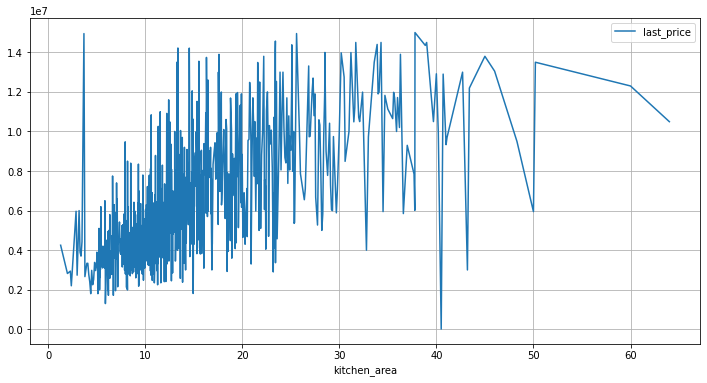

In [70]:
(df
.query('total_area <= 200 & last_price <= 1.5 * 10 ** 7')
.pivot_table(index='kitchen_area', values='last_price')
.plot(grid=True, figsize=(12,6))
)

count    23545.000000
mean        58.885693
std         29.402705
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        494.100000
Name: total_area, dtype: float64

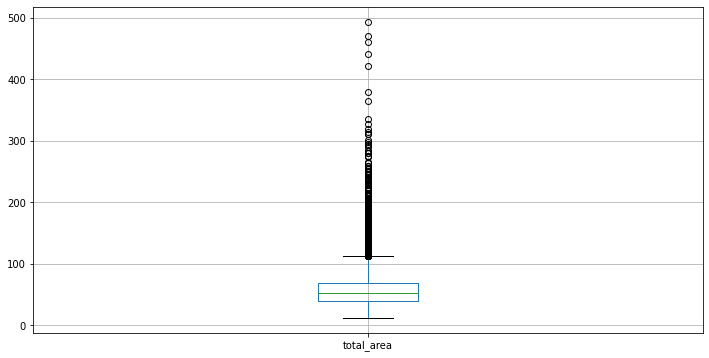

In [71]:
df.boxplot(column='total_area', figsize=(12,6))
df['total_area'].describe()

count    2.354500e+04
mean     6.101638e+06
std      6.391290e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

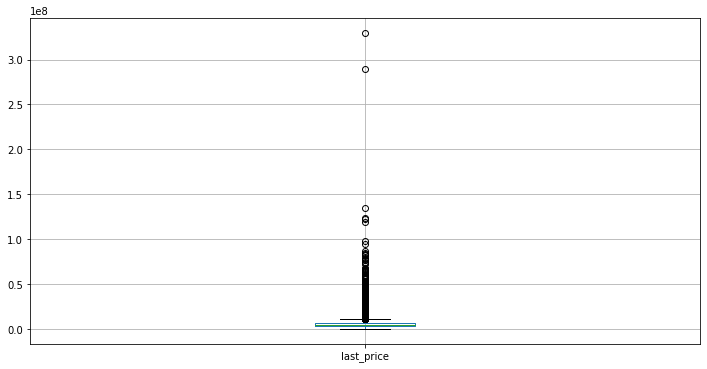

In [72]:
df.boxplot(column='last_price', figsize=(12,6))
df['last_price'].describe()

Отфильтруем данные, отбросив выбросы по параметрам стоимости (11.65 млн. руб.) и общей площади (112.5 м2).


In [73]:
df_clean = df[(df['total_area'] <= 112.5) & (df['last_price'] <= 11.65 * 10 ** 6)]

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

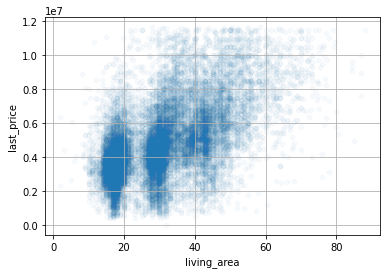

In [74]:
df_clean.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03, grid=True)

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

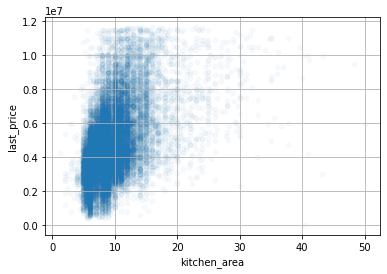

In [75]:
df_clean.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03, grid=True)

Графики зависимости стоимости от жилой площади/площади кухни также прямо пропорциональны. Это довольно логично, ведь зачастую оба указанных параметра прямо пропорциональны общей площади объекта.

<AxesSubplot:xlabel='rooms'>

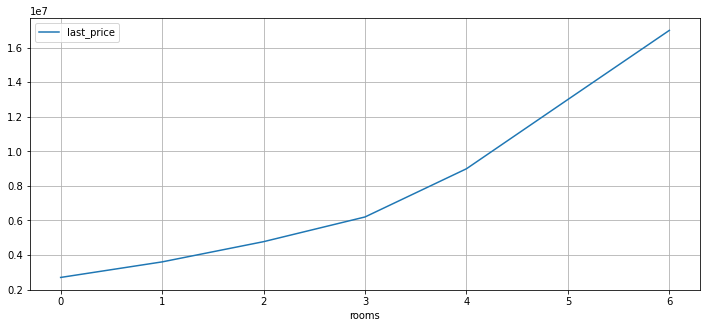

In [76]:
# Количество комнат стандартизированно, посмотрим на медиану стоимости без дополнительных ограничений.
(df
.pivot_table(index='rooms', values='last_price', aggfunc='median')
.plot(grid=True, figsize=(12, 5))
)

Количество комнат положительно влияет на стоимость объекта.

<AxesSubplot:xlabel='floor_group'>

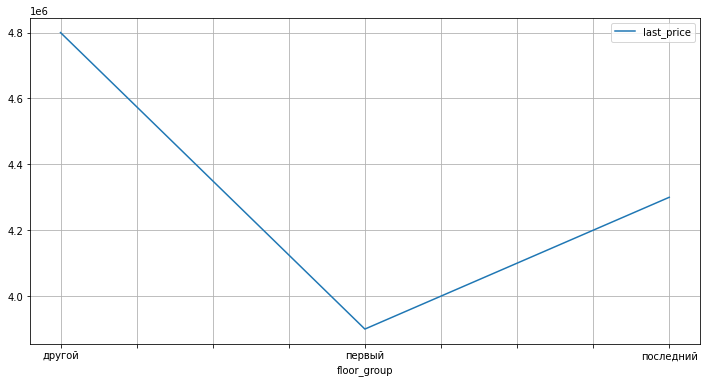

In [77]:
(df
.pivot_table(index='floor_group', values='last_price', aggfunc='median')
.plot(grid=True, figsize=(12,6))
)

Объекты, расположенные на первом и последнем этажах стоят дешевле остальных.

<AxesSubplot:xlabel='weekday_exposition'>

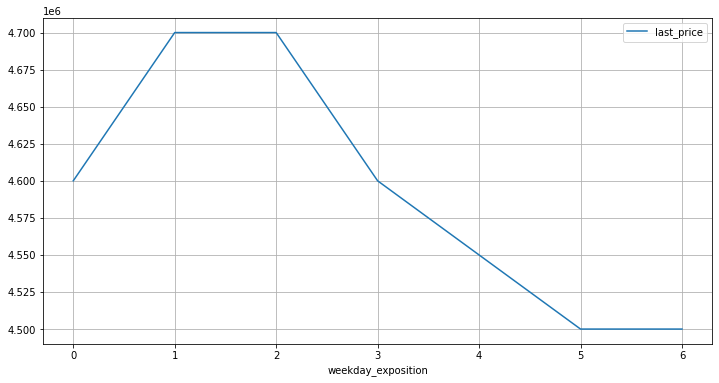

In [78]:
(df
.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
.plot(grid=True, figsize=(12,6))
)

Стоимость ниже при размещении объявления в выходные дни. Это может объясняться меньшим количеством объявлений в эти дни.  
Также размещение объявления в выходные дни может свидетельствовать о срочности продажи, похоже среди срочных продаж больше недорогих квартир.   

<AxesSubplot:xlabel='month_exposition'>

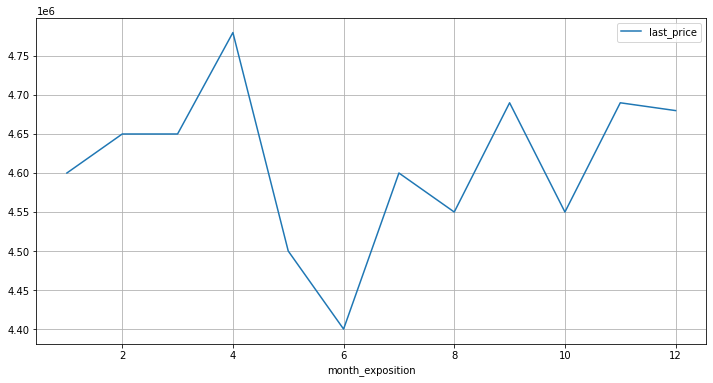

In [79]:
(df
.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
.plot(grid=True, figsize=(12,6))
)

<AxesSubplot:xlabel='year_exposition'>

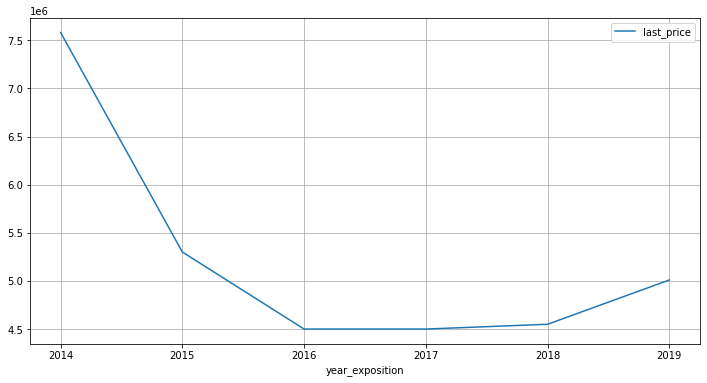

In [80]:
(df
.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
.plot(grid=True, figsize=(12,6))
)

Зависимость между месяцем/годом размещения объявления и стоимостью объекта отсутствует.

Наибольшее влияние на стоимость оказывает общая площадь объекта.  
Увеличение количества комнат также положительно влияет на стоимость (что взаимосвязано с общей площадью).

### Средняя цена квадратного метра в 10 наиболее представленных населённых пунктах

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [83]:
df.groupby('locality_name').agg({'last_price':['count', 'median']}) \
    .sort_values(by = ('last_price', 'count'), ascending = False) \
    .head(10)

last_price           
                     count     median
locality_name                        
Санкт-Петербург      15570  5500000.0
Мурино                 590  3400000.0
Кудрово                472  3890000.0
Шушары                 440  3950000.0
Всеволожск             398  3450000.0
Пушкин                 368  5165000.0
Колпино                337  3600000.0
Парголово              326  4100000.0
Гатчина                307  3100000.0
Выборг                 237  2897000.0

Среди топ-10 населённых пунктов по количеству объектов:
- Самая высокая стоимость за 1м2 в Санкт-Петербурге;
- самая низкая - в Выборге.

### Цена километров в Санкт-Петербурге

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [82]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15570,5500000.0
Мурино,590,3400000.0
Кудрово,472,3890000.0
Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,368,5165000.0
Колпино,337,3600000.0
Парголово,326,4100000.0
Гатчина,307,3100000.0


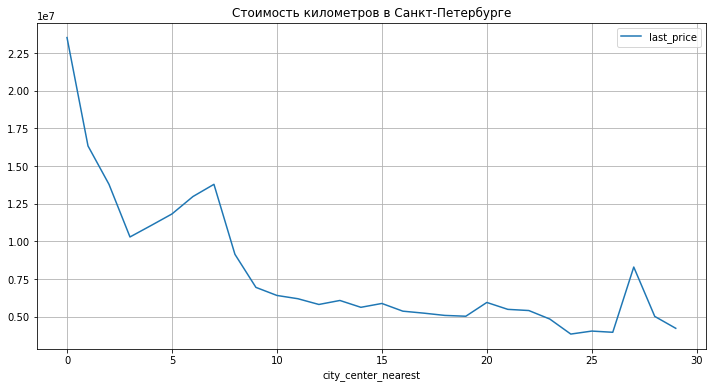

In [84]:
(df
.query('locality_name == "Санкт-Петербург"')
.pivot_table(index='city_center_nearest', values='last_price')
.plot(grid=True, figsize=(12,6), title = 'Стоимость километров в Санкт-Петербурге')
);

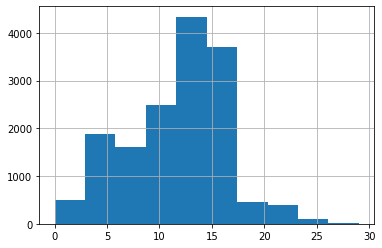

In [86]:
df.query('locality_name == "Санкт-Петербург"')['city_center_nearest'].hist();

Цена объекта в Санкт-Петербурге имеет обратную зависимость к расстоянию от центра. Всплеск на 27км объясняется маленьким количеством объектов.

## Общий вывод

Выполнена предобработка данных (обработаны пропуски, скорректированы типы данных, исправлены неявные дубликаты в названиях населённых пунктов в количестве 16%).

Данные, определяющиеся автоматически, содержат порядка 23% пропусков (расстояния до центра города/ближайшего парка/ближайшего пруда, аэропорта, а также количество ближайших парков/прудов). Рекомендуется проверить корректность работы системы.


- 2/3 объектов расположены в Санкт-Петербурге
- Около 3/4 объектов имеют площадь до 70м2 и стоимость до 8 млн. руб.;
- Среди наиболее представленных населённых пунктов наибольшая стоимость квадратного метра в Санкт-Петербурге, рекомендуется сконцентрировать маркетинговые инвестиции в этом городе;
- **Наибольшее положительное влияние на стоимость объекта оказывает его площадь;**
- Первый и последний этажи негативно влияют на стоимость объекта;
- Близость к центру города повышает стоимость объекта.